In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [23]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/syntheticlogdelaydoctorcasemorebatch.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='doctor test':
        print("activity: "+act_res[0][0]+" resource: "+str(act_res[0][1]))
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/2000 [00:00<?, ?it/s]

activity: doctor test resource: 1
number of distinct batches: 123
Simultaneous 123
2020-01-22 14:30:00 to  2020-01-22 14:30:00
2020-01-26 17:30:00 to  2020-01-26 17:30:00
2020-01-27 15:30:00 to  2020-01-27 15:30:00
2020-01-28 16:30:00 to  2020-01-28 16:30:00
2020-01-29 14:30:00 to  2020-01-29 14:30:00
2020-01-29 15:30:00 to  2020-01-29 15:30:00
2020-01-29 17:30:00 to  2020-01-29 17:30:00
2020-02-02 11:30:00 to  2020-02-02 11:30:00
2020-02-02 12:30:00 to  2020-02-02 12:30:00
2020-02-02 13:30:00 to  2020-02-02 13:30:00
2020-02-04 16:30:00 to  2020-02-04 16:30:00
2020-02-05 11:30:00 to  2020-02-05 11:30:00
2020-02-05 12:30:00 to  2020-02-05 12:30:00
2020-02-05 13:30:00 to  2020-02-05 13:30:00
2020-02-06 14:30:00 to  2020-02-06 14:30:00
2020-02-08 11:30:00 to  2020-02-08 11:30:00
2020-02-08 12:30:00 to  2020-02-08 12:30:00
2020-02-08 13:30:00 to  2020-02-08 13:30:00
2020-02-08 14:30:00 to  2020-02-08 14:30:00
2020-02-11 11:30:00 to  2020-02-11 11:30:00
2020-02-11 12:30:00 to  2020-02-11 12

In [2]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\syntheticlogdoctormorebatchtarget.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [3]:
targetdatedataframe


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList
0,2020-01-22,27,15,12,6 days 03:00:00,27,"['1933', '1808', '1731', '1634', '1459', '1352..."
1,2020-01-23,25,11,26,23 days 17:00:00,37,"['1923', '1754', '1726', '1526', '1506', '1180..."
2,2020-01-24,20,11,35,53 days 09:30:00,46,"['1956', '1906', '1902', '1640', '1613', '1458..."
3,2020-01-25,25,12,48,94 days 04:00:00,60,"['1712', '1483', '1447', '1333', '1294', '1049..."
4,2020-01-26,19,11,56,145 days 04:00:00,67,"['1867', '1841', '1791', '1521', '1493', '1026..."
...,...,...,...,...,...,...,...
94,2020-04-25,0,0,71,579 days 05:30:00,71,[]
95,2020-04-26,0,39,32,631 days 17:00:00,71,"['1969', '1914', '1869', '1843', '1763', '1729..."
96,2020-04-27,0,0,32,272 days 15:00:00,32,[]
97,2020-04-28,0,0,32,304 days 15:00:00,32,[]


[6, 8, 10, 12, 18, 24, 30, 42, 54, 60, 72, 78, 80, 84, 90, 92, 96, 99]


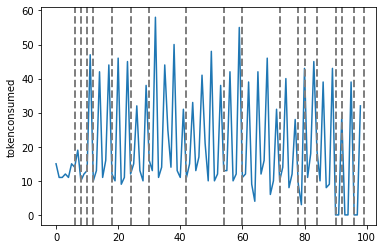

In [5]:
algo_python = rpt.Pelt(model="l2", jump=2, min_size=2).fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

04:11:50 - cmdstanpy - INFO - Chain [1] start processing
04:11:50 - cmdstanpy - INFO - Chain [1] done processing


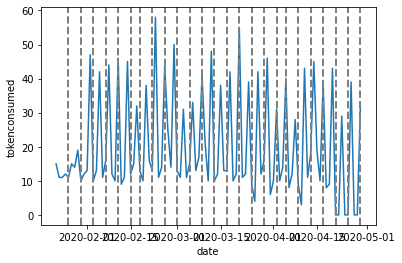

In [10]:
targetdatedataframe.sort_values(by='date')
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet

m = Prophet(changepoint_range=1,changepoint_prior_scale=0.05)
forecast=m.fit(targetdatedataframe[['date','tokenconsumed']].rename({'date': 'ds','tokenconsumed':'y'}, axis=1))
#future = m.make_future_dataframe(periods=366)
#forecast = m.predict(future)
sns.lineplot(data=targetdatedataframe, x="date", y="tokenconsumed")
#result.changepoints
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='chunkmean'>

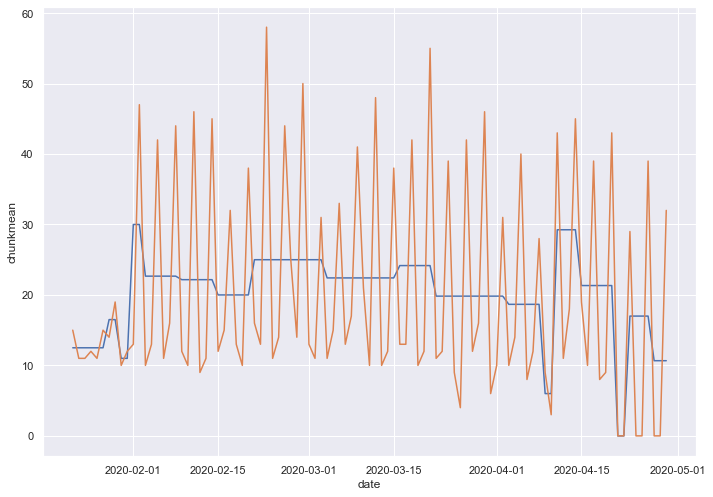

In [9]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
sns.set(rc={'figure.figsize':(11.7,8.27)})
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


[20, 30, 35, 40, 45, 50, 60, 75, 80, 90, 99]


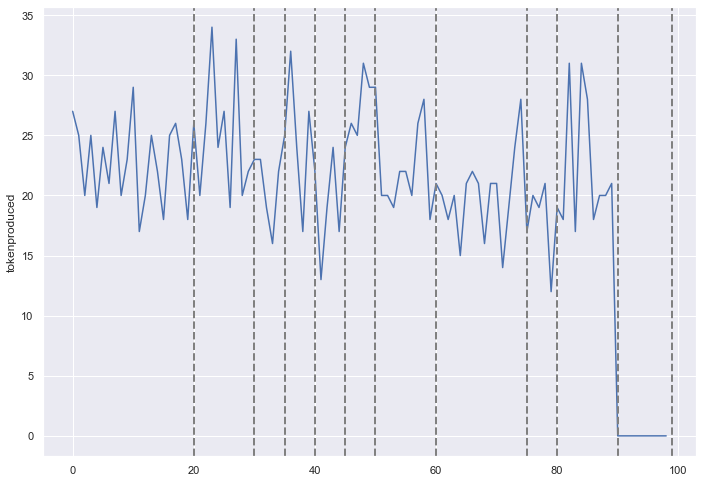

In [10]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

In [54]:
def categorise(row):   
    if row['chunkmean']*1.5 < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

26


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,pchunkmean,pchunkindex,chunkbatched,pchunkbatched
11,2020-02-02,17,47,87,736 days 20:30:00,134,"['1919', '1886', '1881', '1773', '1762', '1750...",30.000000,4,22.700000,1,1,0
14,2020-02-05,22,42,89,677 days 21:30:00,131,"['1959', '1909', '1893', '1778', '1738', '1699...",22.666667,5,22.700000,1,1,0
17,2020-02-08,26,44,87,663 days 12:30:00,131,"['1991', '1983', '1937', '1904', '1894', '1833...",22.666667,5,22.700000,1,1,1
20,2020-02-11,26,46,86,707 days 02:00:00,132,"['1896', '1828', '1816', '1802', '1768', '1709...",22.166667,6,25.100000,2,1,1
23,2020-02-14,34,45,101,682 days 03:30:00,146,"['1929', '1874', '1872', '1844', '1743', '1677...",22.166667,6,25.100000,2,1,1
26,2020-02-17,19,32,112,705 days 21:00:00,144,"['1831', '1782', '1673', '1567', '1515', '1487...",20.000000,7,25.100000,2,1,0
29,2020-02-20,22,38,126,867 days 00:00:00,164,"['1993', '1950', '1842', '1767', '1764', '1725...",20.000000,7,25.100000,2,1,0
32,2020-02-23,19,58,104,950 days 13:00:00,162,"['1980', '1974', '1957', '1939', '1932', '1930...",25.000000,8,20.600000,3,1,0
35,2020-02-26,25,44,98,818 days 13:00:00,142,"['1975', '1967', '1944', '1918', '1847', '1824...",25.000000,8,25.000000,4,1,0
38,2020-02-29,17,50,82,787 days 04:00:00,132,"['1849', '1788', '1777', '1759', '1756', '1642...",25.000000,8,25.000000,4,1,0


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='pchunkmean'>

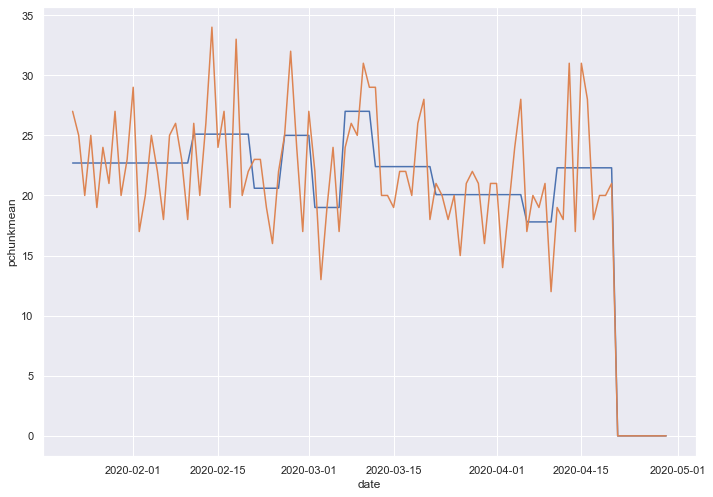

In [11]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')


In [14]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

42


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,pchunkmean,pchunkindex,chunkbatched,pchunkbatched
0,2020-01-22,27,15,12,6 days 03:00:00,27,"['1933', '1808', '1731', '1634', '1459', '1352...",12.500000,1,22.700000,1,0,1
1,2020-01-23,25,11,26,23 days 17:00:00,37,"['1923', '1754', '1726', '1526', '1506', '1180...",12.500000,1,22.700000,1,0,1
3,2020-01-25,25,12,48,94 days 04:00:00,60,"['1712', '1483', '1447', '1333', '1294', '1049...",12.500000,1,22.700000,1,0,1
5,2020-01-27,24,15,65,205 days 01:30:00,80,"['1916', '1760', '1623', '1590', '1318', '1146...",12.500000,1,22.700000,1,0,1
7,2020-01-29,27,19,80,349 days 00:00:00,99,"['1796', '1795', '1779', '1662', '1625', '1608...",16.500000,2,22.700000,1,0,1
9,2020-01-31,23,12,101,526 days 16:30:00,113,"['1787', '1646', '1392', '1267', '1132', '936'...",11.000000,3,22.700000,1,0,1
10,2020-02-01,29,13,117,634 days 21:30:00,130,"['1692', '1681', '1594', '1400', '1268', '1236...",30.000000,4,22.700000,1,0,1
13,2020-02-04,25,13,109,579 days 10:30:00,122,"['1994', '1946', '1820', '1797', '1742', '1628...",22.666667,5,22.700000,1,0,1
16,2020-02-07,25,16,105,567 days 13:30:00,121,"['1440', '1374', '1341', '912', '882', '705', ...",22.666667,5,22.700000,1,0,1
17,2020-02-08,26,44,87,663 days 12:30:00,131,"['1991', '1983', '1937', '1904', '1894', '1833...",22.666667,5,22.700000,1,1,1


In [50]:
realbatchesdf = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\realbatchdf.csv')
realbatchesdf['date']=pd.to_datetime(realbatchesdf['date']).dt.date
realbatchesdf

,date
0,2020-02-02
1,2020-02-05
2,2020-02-08
3,2020-02-11
4,2020-02-14
5,2020-02-17
6,2020-02-20
7,2020-02-23
8,2020-02-26
9,2020-02-29


In [ ]:
Shared - 19
Pm4py- 40
Statistical- 32
Original- 10


In [17]:
pd.set_option('display.max_rows',310)
merged=pd.merge(df,realbatchesdf,on='date',how='inner')
print('PM4PY TP/P:',merged['date'].nunique()/df['date'].nunique())
merged=pd.merge(batcheddf,realbatchesdf,on='date',how='inner')
print('Statistical TP/P:',merged['date'].nunique()/batcheddf['date'].nunique())

NameError: name 'df' is not defined

In [69]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
df['date']=df['batchingdate'].dt.date
date = df.date.unique()
df=df['date']
print(df.nunique())

220
86


In [72]:
df

0      2020-01-27
1      2020-04-15
2      2020-02-11
3      2020-02-20
4      2020-04-20
5      2020-03-24
6      2020-02-07
7      2020-01-30
8      2020-01-26
9      2020-03-24
10     2020-01-23
11     2020-03-25
12     2020-03-08
13     2020-02-09
14     2020-03-12
15     2020-02-23
16     2020-02-19
17     2020-02-03
18     2020-04-03
19     2020-04-14
20     2020-02-26
21     2020-03-12
22     2020-02-21
23     2020-03-30
24     2020-03-03
25     2020-02-11
26     2020-02-28
27     2020-03-02
28     2020-04-16
29     2020-01-29
30     2020-03-10
31     2020-04-07
32     2020-02-17
33     2020-02-02
34     2020-02-01
35     2020-01-28
36     2020-03-02
37     2020-03-06
38     2020-02-26
39     2020-04-04
40     2020-02-22
41     2020-02-04
42     2020-02-08
43     2020-04-14
44     2020-03-05
45     2020-02-07
46     2020-02-23
47     2020-02-23
48     2020-04-09
49     2020-03-29
50     2020-03-15
51     2020-02-27
52     2020-01-31
53     2020-04-16
54     2020-02-18
55     202

In [70]:
#batcheddf['date'].to_csv (r'C:\Users\bittu\RWTH\Thesis\realbatchdf.csv', index = False, header=True)

pd.merge(realbatchesdf,df,on='date',how='right').nunique()

date    86
dtype: int64

In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date